In [1]:
import json
import pandas as pd
import time
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import os
%matplotlib inline

def new_modifae(trait_name='attractive'):
    trait_name = 'attractive'
    sub_folder_prefix = 'modifae_new_'  # for gt data, sub_folder_name = ''

    sub_folder_name = sub_folder_prefix + trait_name

    likert_csv = './' + sub_folder_name + '/likert_data.csv'

    likert_data = pd.read_csv(likert_csv)

    sub_num_dict = {}
    sub_counter = 1
    for sub_id in likert_data['subId']:
        if sub_id not in sub_num_dict:
            sub_num_dict[sub_id] = sub_counter
            sub_counter += 1

    likert_data['subNum'] = likert_data['subId'].map(sub_num_dict)

    img_num_dict = {}
    img_counter = 0
    for img_name in likert_data['imgName']:
        if img_name not in img_num_dict:
            img_num_dict[img_name] = img_counter
            img_counter += 1

    likert_data['imgNum'] = likert_data['imgName'].map(img_num_dict)

    likert_data = likert_data.sort_values(by=['subNum', 'imgNum'], ascending=True)
    likert_data = likert_data[['subNum', 'imgNum', 'rating', 'rt', 'imgName', 'trial_index']]
    likert_data['rating'] = likert_data['rating'].astype(np.int64)
    likert_data.head()
    
    rho_lst = []
    p_lst = []
    for sub_num in range(1, likert_data['subNum'].nunique()+1):
        cur_sub_data = likert_data[likert_data['subNum']==sub_num]
        cur_sub_data['freq'] = cur_sub_data.groupby('imgNum')['imgNum'].transform('count')
        repeat_lst = cur_sub_data[cur_sub_data['freq']==2]
        p = repeat_lst.sort_values(by=['imgNum'])
        p1 = p[::2]
        p2 = p[1::2]

        first_half = p1['rating'].values
        second_half = p2['rating'].values
        rho, p = spearmanr(first_half, second_half)
        rho_lst.append(rho)
        p_lst.append(p)

        unique_coor = sorted(set(zip(first_half, second_half)))
        total_coor = list(zip(first_half, second_half))

        size = []

        for coor in unique_coor:
            size.append(total_coor.count(coor))

        x_unique_coor, y_unique_coor = zip(*unique_coor)

        colors = np.random.rand(len(x_unique_coor))

        plt.title('sub' + str(sub_num)+'rho = {:.2f}, p = {:.2f}'.format(rho, p))
        plt.xlabel('First repeat')
        plt.ylabel('Second repeat')
        plt.scatter(x_unique_coor, y_unique_coor, s=np.array(size)*100, alpha=0.5, c=colors)
        plt.show()
        
    return rho_lst, p_lst

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


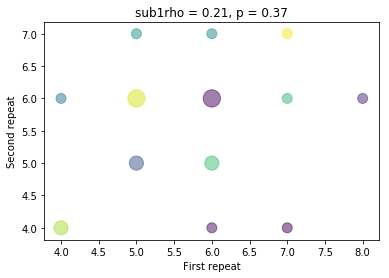

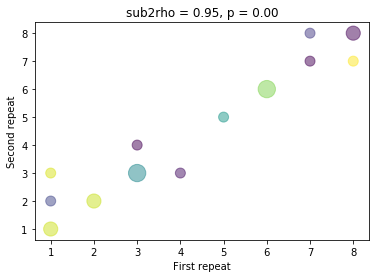

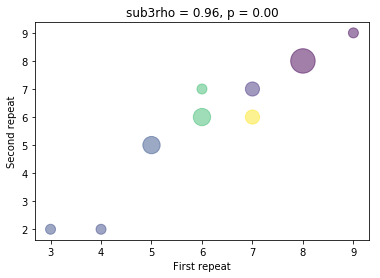

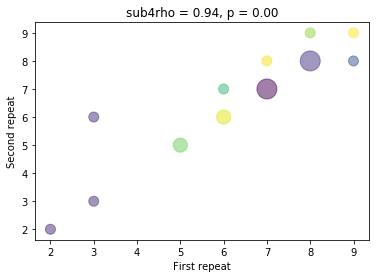

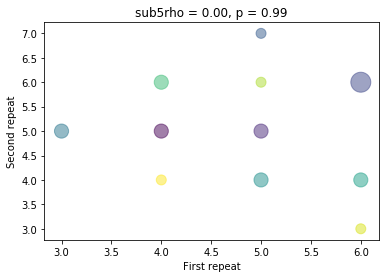

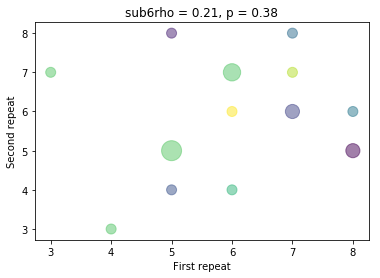

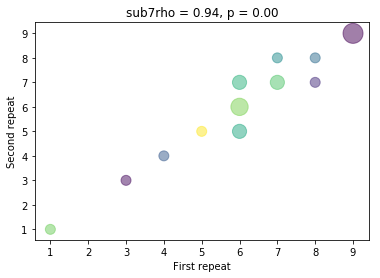

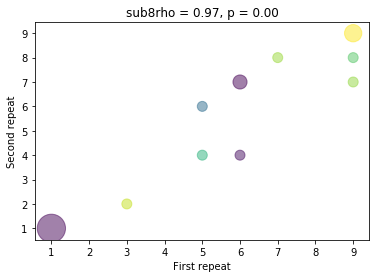

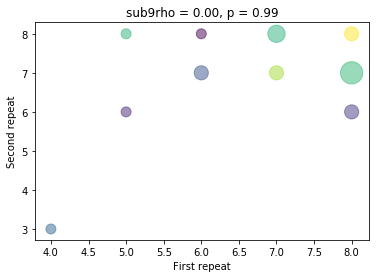

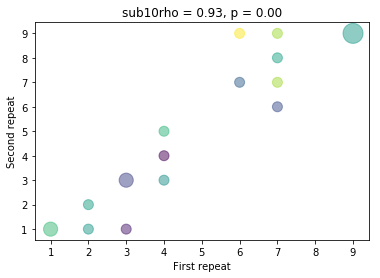

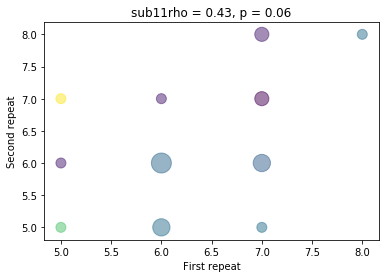

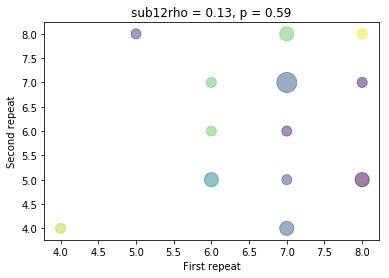

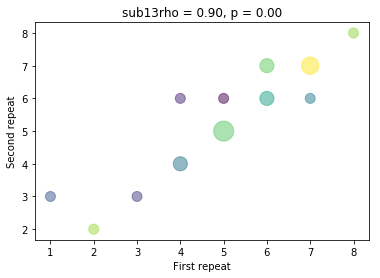

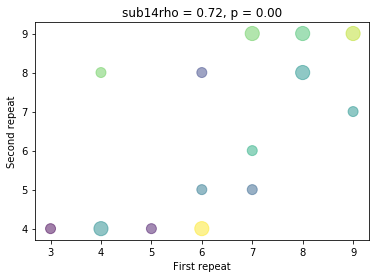

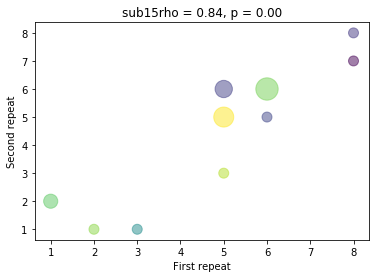

In [9]:
new_modifae(trait_name='attractive')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


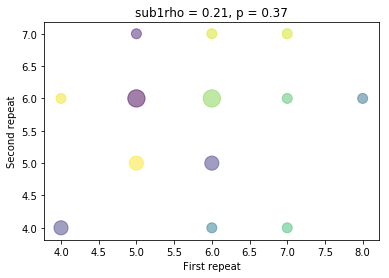

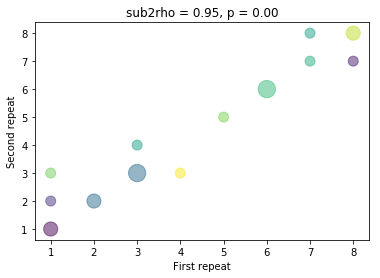

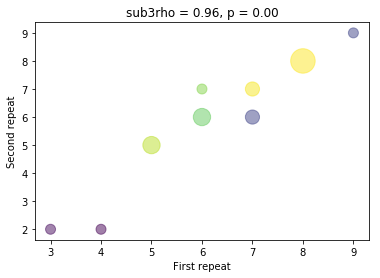

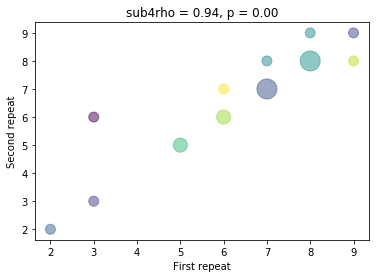

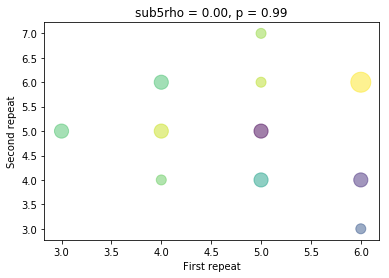

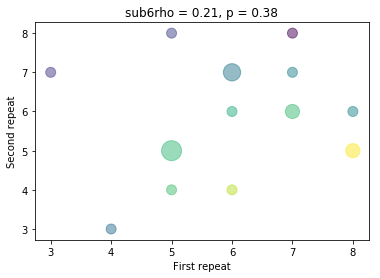

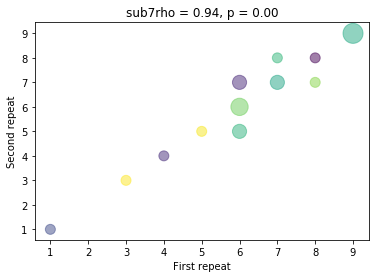

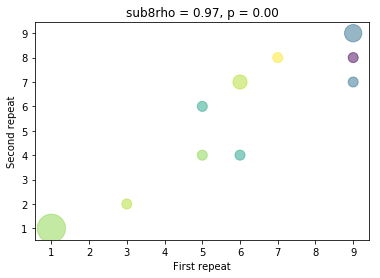

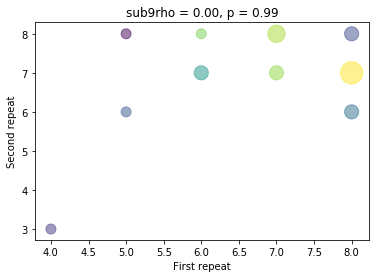

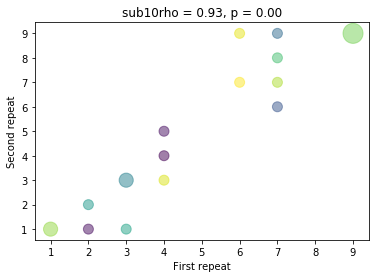

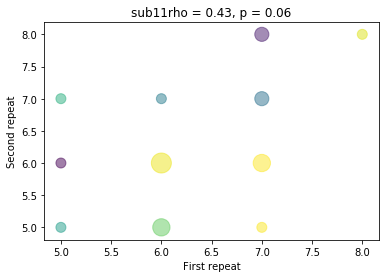

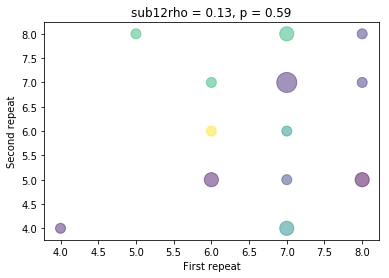

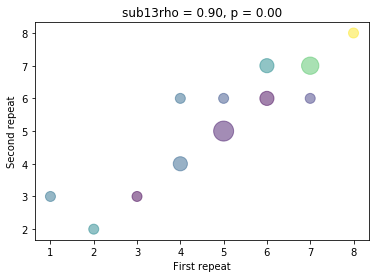

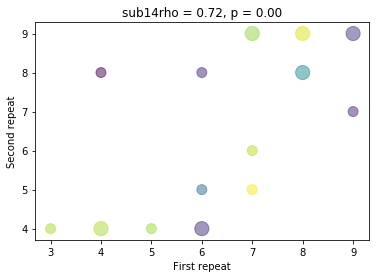

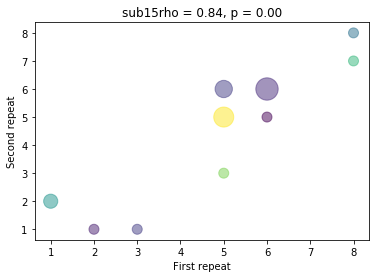

In [10]:
new_modifae(trait_name='aggressive')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


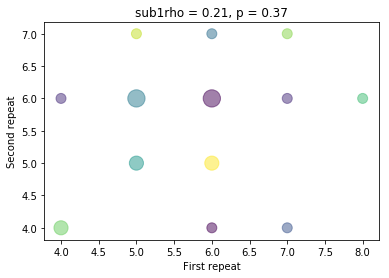

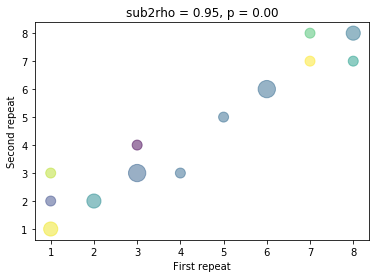

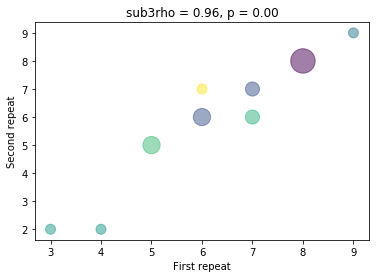

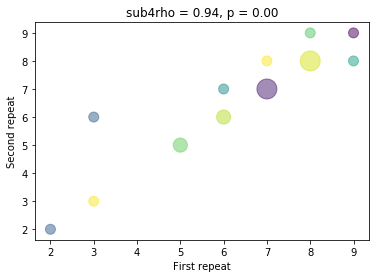

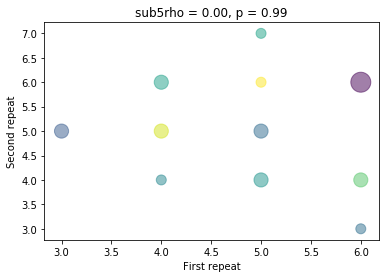

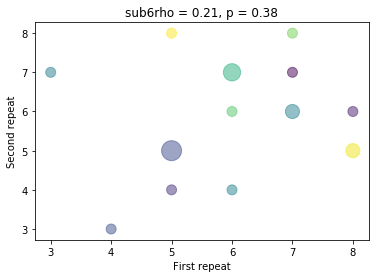

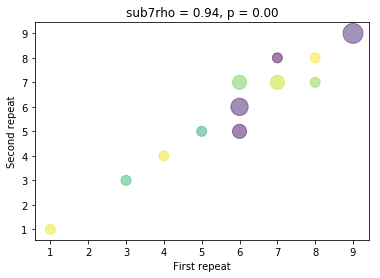

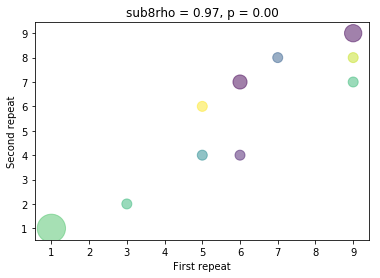

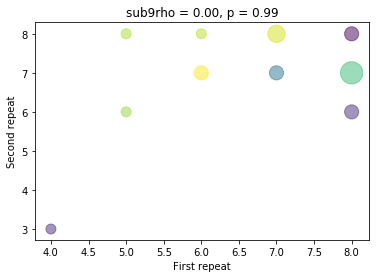

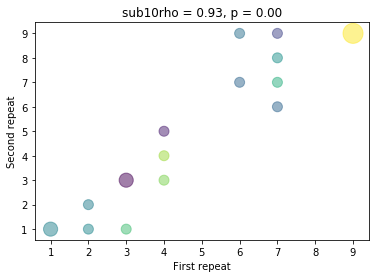

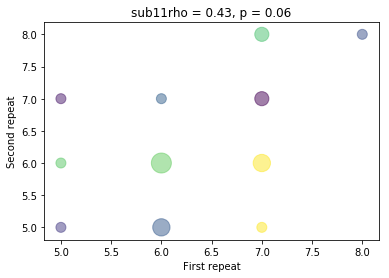

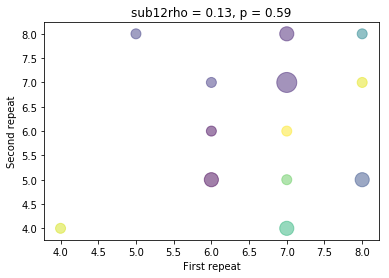

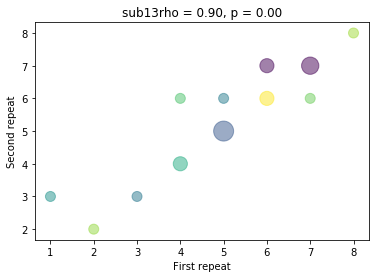

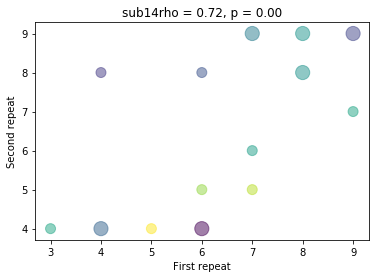

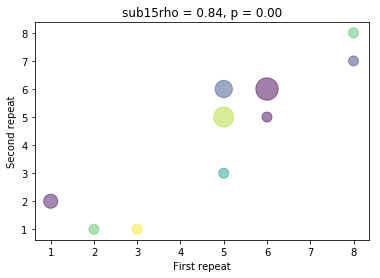

In [2]:
rho, p = new_modifae(trait_name='trustworthy')